# PCA vs LDA

Comparing various dimension reducing techniques in supervised learning

In [78]:
%matplotlib inline
import numpy as np
from sklearn import svm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

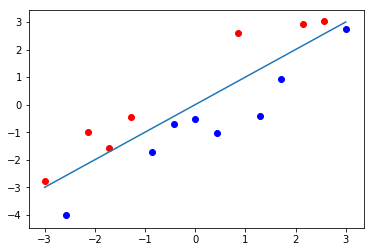

In [88]:
np.random.seed(9119)
x = np.linspace(-3, 3, 15)
y = x + np.random.normal(size=len(x))
data = np.column_stack((x, y))
labels = np.array([x[i] < y[i] for i in range(len(x))]).astype(int)

plt.scatter(data[:,0][labels == 1], data[:,1][labels == 1], color="red")
plt.scatter(data[:,0][labels == 0], data[:,1][labels == 0], color="blue")
plt.plot(x, x)

# Normalization

We should normalize our data. Still not fully sure why, but we should...

Note that this doesn't change the shape of the data, nor in this case does it change the mean as it is already 0 centered (it may change the y means slightly if the random component was a bit biased).

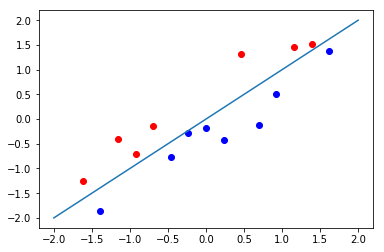

In [89]:
data = preprocessing.scale(Data)
plt.scatter(data[:,0][labels == 1], data[:,1][labels == 1], color="red")
plt.scatter(data[:,0][labels == 0], data[:,1][labels == 0], color="blue")
x = np.linspace(-2, 2, 15) # only need to go to 2 because things are compressed
plt.plot(x, x)

# PCA

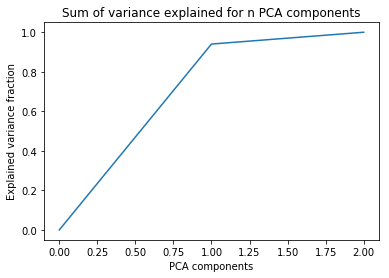

The axis with d/dx = -0.7071067811865476 and d/dy = -0.7071067811865475 contains 0.9402427746229786% of the variance
The axis with d/dx = -0.7071067811865475 and d/dy = 0.7071067811865476 contains 0.05975722537702148% of the variance
Therefore, our axis in order of importance are
y = 0.9999999999999999x
y = -1.0000000000000002x


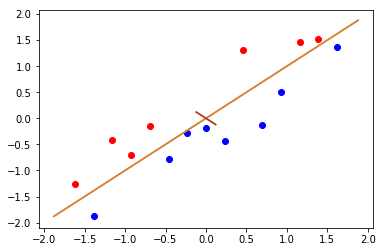

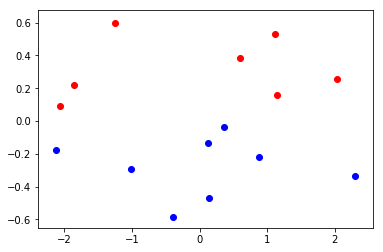

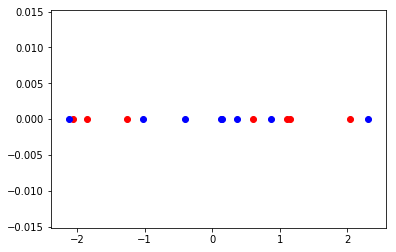

In [113]:
components = 2
pca = PCA(n_components=components)
pca.fit(data)

# How much variance in the data does PCA explain?
cumulative_explained = [0]
for i in range(components):
    cumulative_explained.append(sum(pca.explained_variance_ratio_[:i+1]))
_, ax = plt.subplots()
_ = ax.plot(cumulative_explained)
_ = ax.set(xlabel="PCA components", ylabel="Explained variance fraction", 
       title="Sum of variance explained for n PCA components")
plt.show()

# What do the axis look like?
for i in range(components):
    print("The axis with d/dx = {} and d/dy = {} contains {}% of the variance".format(
        pca.components_[i][0], pca.components_[i][1], pca.explained_variance_ratio_[i]))
print("Therefore, our axis in order of importance are")
for i in range(components):
    print("y = {}x".format(pca.components_[i][1]/pca.components_[i][0]))

# Plot data with axis
plt.scatter(data[:,0][labels == 1], data[:,1][labels == 1], color="red")
plt.scatter(data[:,0][labels == 0], data[:,1][labels == 0], color="blue")
x = np.linspace(-2, 2, 15) # only need to go to 2 because things are compressed
for i in range(components):
    subx = x * pca.explained_variance_ratio_[i]
    plt.plot(subx, subx * pca.components_[i][1]/pca.components_[i][0])
    plt.plot(subx, subx * pca.components_[i][1]/pca.components_[i][0])
plt.show() 

# Now transform data onto the new axis
pcaData = pca.transform(data)
plt.scatter(pcaData[:,0][labels == 1], pcaData[:,1][labels == 1], color="red")
plt.scatter(pcaData[:,0][labels == 0], pcaData[:,1][labels == 0], color="blue")
plt.show()

# But if we have done this with only 1 component we would have lost all info
pca = PCA(n_components=1)
pca.fit(data)
pcaData = pca.transform(data)
plt.scatter(pcaData[:,0][labels == 1], [0] * len(pcaData[:,0][labels == 1]), color="red")
plt.scatter(pcaData[:,0][labels == 0], [0] * len(pcaData[:,0][labels == 0]), color="blue")
plt.show()

But notice that the primary component does nothing to separate the labels. If we were to train a model just on the primary component, it would be completely useless at predicting.

This is a potential downfall of PCA. While it very nicely divides our data set into axis of more and less variance, we can't be sure that those axis are the ones that have strong predictive power. If we have labels, LDA can do a better job of that.

# LDA

In [121]:
components=2
lda = LDA(n_components=components)
labels[-1] = 3
labels[0] = 3
lda.fit(data, labels)

print(lda.coef_)
print(lda.intercept_)
print(lda.explained_variance_ratio_)

[[ 5.62697084 -6.52320241]
 [-6.314308    7.32137488]
 [-0.75147395  0.86708379]]
[-2.13871353 -2.65039058 -2.03921732]
[  9.99999077e-01   9.23167512e-07]


[[ 0.53594386  1.45990996]
 [-2.63063288  1.1952431 ]
 [ 2.31203233  1.07782341]
 [ 0.39009805  0.8357567 ]
 [ 1.76957393  0.65363682]
 [-1.46320911  0.38776779]
 [-0.31388853  0.20146876]
 [-0.72815213 -0.01322175]
 [-2.48278621 -0.25225062]
 [ 3.59299639 -0.34909523]
 [-2.86524589 -0.67353197]
 [-1.13091142 -0.84920835]
 [ 1.84380535 -1.00236194]
 [ 1.26535499 -1.22003374]
 [-0.09497873 -1.45190294]]


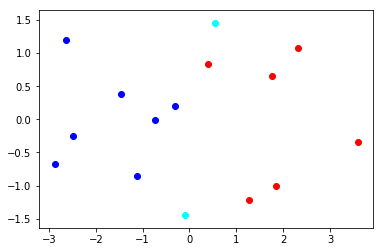

In [122]:
ldaData = lda.transform(data)
print(ldaData)
plt.scatter(ldaData[:,0][labels == 1], ldaData[:,1][labels == 1], color="red")
plt.scatter(ldaData[:,0][labels == 0], ldaData[:,1][labels == 0], color="blue")
plt.scatter(ldaData[:,0][labels == 3], ldaData[:,1][labels == 3], color="cyan")

plt.show()